Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.901
Test Accuracy (best model): 0.886

Visualizing best SVM decision boundary...


c:\Users\elias\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


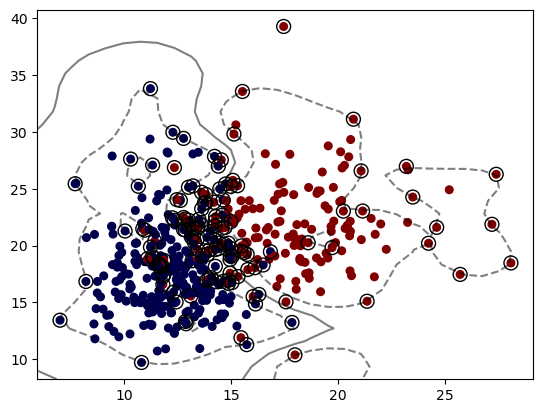


Explanation:
------------
• GridSearchCV tested multiple kernels (linear, poly, rbf) and parameters (C, gamma).
• The best combination achieved the highest cross-validation accuracy.
• Linear kernel gives a straight line; RBF and Poly create curved, more flexible boundaries.
• The RBF kernel uses the 'kernel trick' to map data into a higher-dimensional space,
  allowing a linear separation in that space even when data is not linearly separable in 2D.



In [1]:
# Q3_gridsearch_svm.py
# --------------------------------------------------
# Full workflow:
# 1. Load and encode dataset
# 2. Train SVM with GridSearchCV across kernels
# 3. Show best params and test accuracy
# 4. Visualize decision boundary using svm_margin_plot.py
# --------------------------------------------------

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from svm_margin_plot import plot_svm_boundary  # your helper file

# 1️⃣ Load dataset
df = pd.read_csv(r"data\breast-cancer.csv")

# Encode target (M/B → 0/1)
le = LabelEncoder()
df['target'] = le.fit_transform(df['diagnosis'])

# Pick 2 features for 2D visualization
X = df[['radius_mean', 'texture_mean']]
y = df['target']

# 2️⃣ Split data (train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 4️⃣ Define parameter grid
params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10]
}

# 5️⃣ GridSearchCV setup
svm = SVC(random_state=42)

grid = GridSearchCV(
    estimator=svm,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_s, y_train)

# 6️⃣ Print best results
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", round(grid.best_score_, 3))

best_model = grid.best_estimator_
test_acc = accuracy_score(y_test, best_model.predict(X_test_s))
print("Test Accuracy (best model):", round(test_acc, 3))

# 7️⃣ Retrain the best model on UNscaled data for visualization
# (because plot_svm_boundary doesn’t handle scaled input)
X_train_inv = pd.DataFrame(
    scaler.inverse_transform(X_train_s),
    columns=['radius_mean', 'texture_mean']
)

svm_unscaled = SVC(
    kernel=grid.best_params_['kernel'],
    C=grid.best_params_['C'],
    gamma=grid.best_params_['gamma'],
    random_state=42
)
svm_unscaled.fit(X_train_inv, y_train)

# 8️⃣ Visualize decision boundary
print("\nVisualizing best SVM decision boundary...")
plot_svm_boundary(svm_unscaled, X_train_inv, y_train)

# 9️⃣ Short explanation (optional print for reference)
print("""
Explanation:
------------
• GridSearchCV tested multiple kernels (linear, poly, rbf) and parameters (C, gamma).
• The best combination achieved the highest cross-validation accuracy.
• Linear kernel gives a straight line; RBF and Poly create curved, more flexible boundaries.
• The RBF kernel uses the 'kernel trick' to map data into a higher-dimensional space,
  allowing a linear separation in that space even when data is not linearly separable in 2D.
""")
